<a href="https://colab.research.google.com/github/r7022/heart_disease_prediction/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

# Import DataSet

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Removing Outliers**

AxesSubplot(0.125,0.125;0.775x0.755)


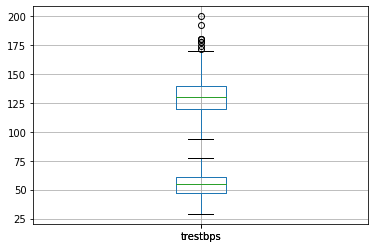

In [ ]:
a=df.boxplot(column='age')
b=df.boxplot(column='trestbps')
print(a)
#print(b)


**Data Visualization**

**Correlation Matrix**

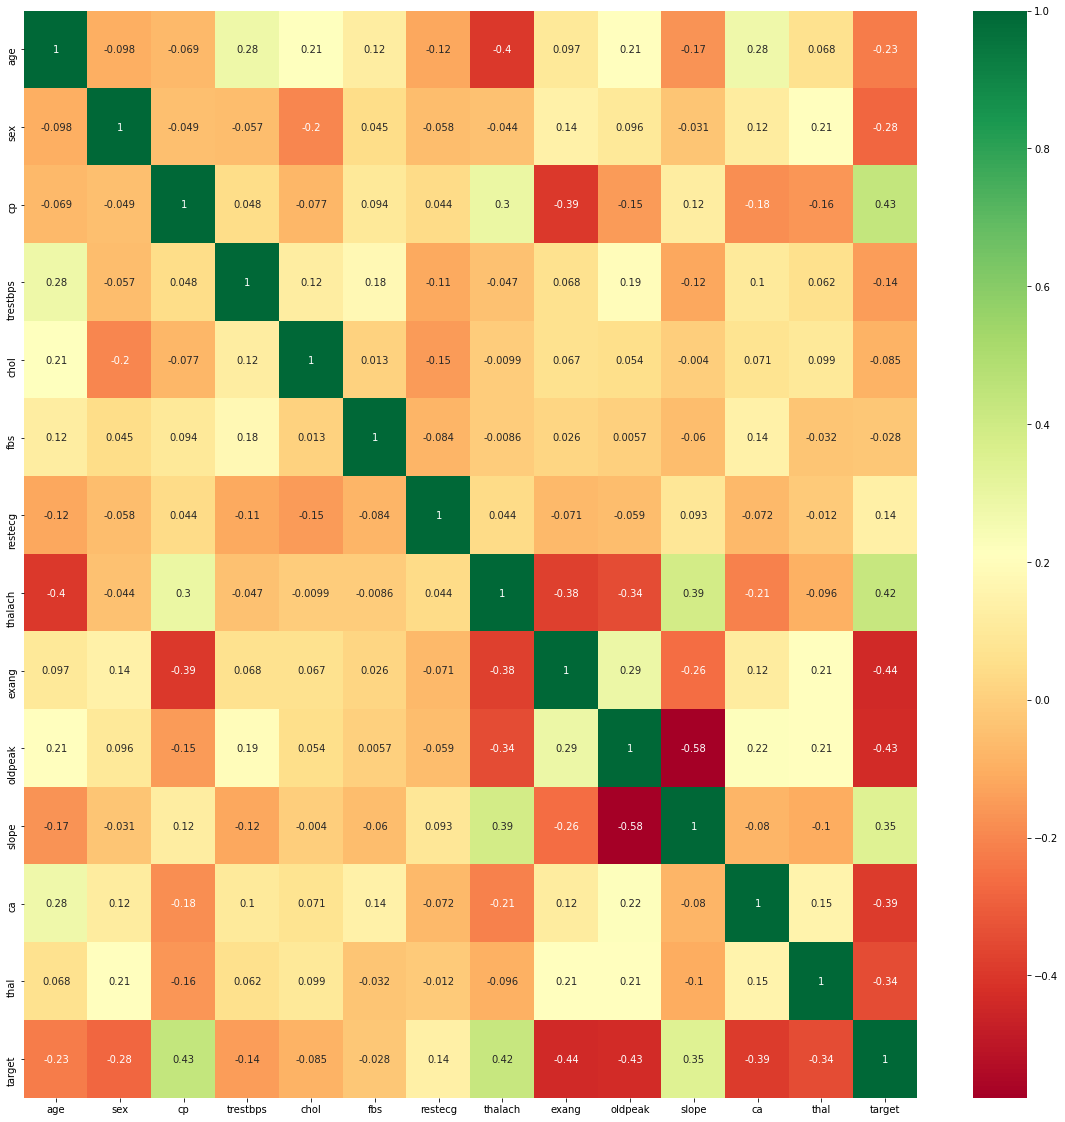

In [ ]:
import seaborn as sns
#To get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7be3388950>,
      dtype=object)

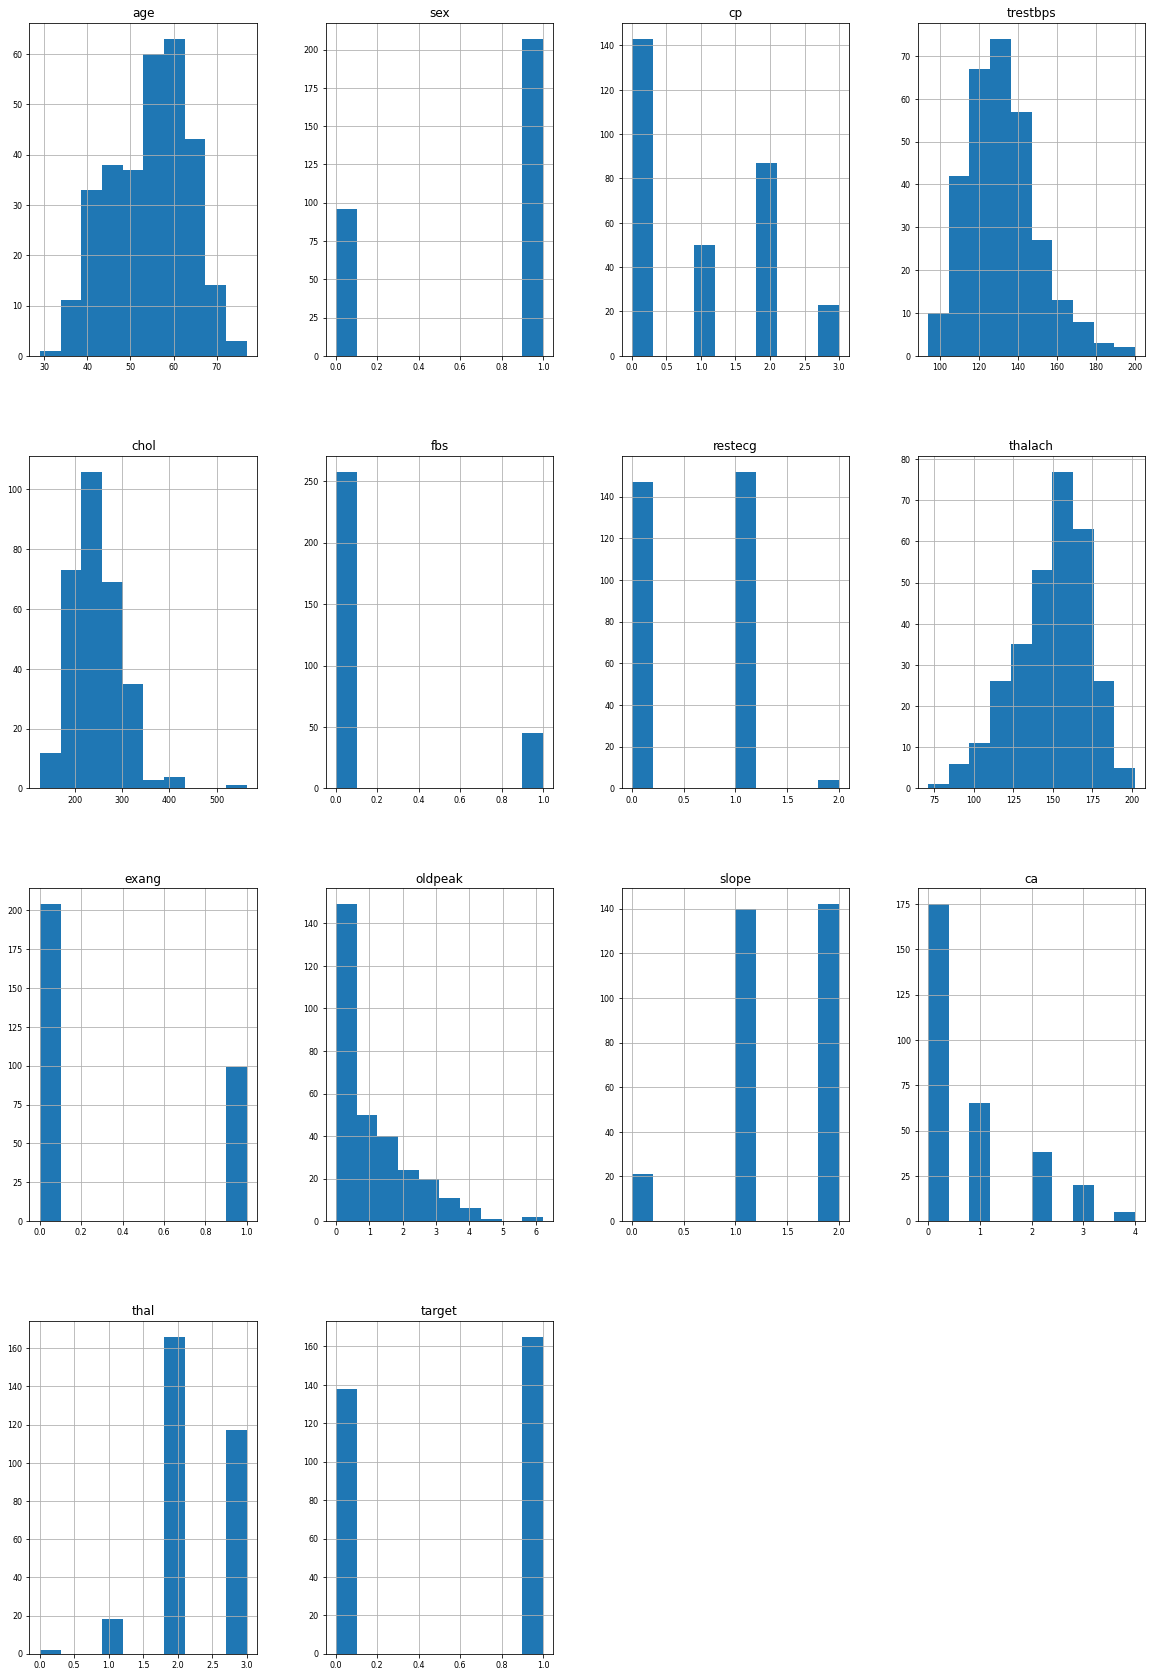

In [ ]:
df.hist(figsize=(20, 30), xlabelsize=8, ylabelsize=8)

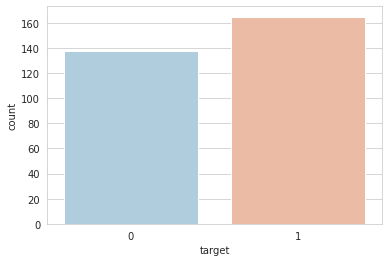

In [ ]:
sns.set_style('whitegrid') #styling
sns.countplot(x='target',data=df,palette='RdBu_r')

In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])# converting categorical variables into dummy variables

# **Training Data Set**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
X = dataset.drop(['target'], axis = 1)#Independent variable #removing target for input
y = dataset['target'] #dependent variable 

#**Testing DataSet**

# **KNeighborsClassification**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier  #KNeighborsClassification
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10) #cv -> groups
    knn_scores.append(score.mean())
knn_scores


[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

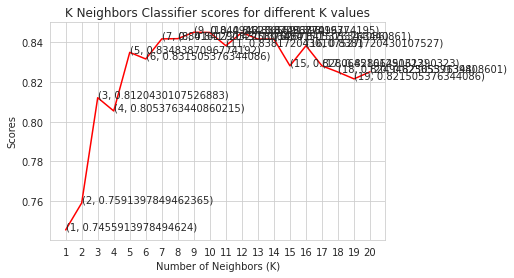

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [ ]:
score.mean()

0.8448387096774195

# **Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_classifier= RandomForestClassifier(n_estimators=100,max_features='auto', bootstrap=True, oob_score=False,min_samples_leaf=5)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [ ]:
score.mean()

0.8448387096774195

# **Logistic Classification** 

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.17, random_state=2)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_

In [ ]:
model=LogisticRegression(random_state=0)

In [ ]:
model.fit(X_train,y_train)
prediction=model.predict(X_test)
#print(prediction)
#print(type(prediction))

*Training Data* 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


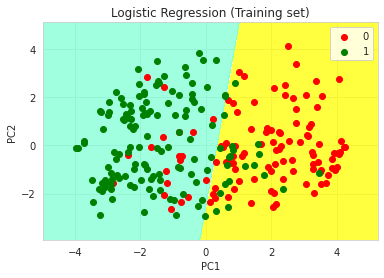

In [ ]:
from matplotlib.colors import ListedColormap 
  
X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                     stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1, 
                     stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), 
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 
  
plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 
  
# show scatter plot 
plt.show()

*Testing Data*

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


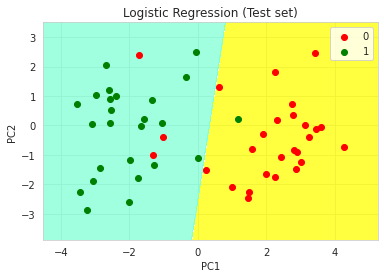

In [ ]:
from matplotlib.colors import ListedColormap 

X_set, y_set = X_test, y_test 

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1,stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), 
X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 

# title for scatter plot 
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 

# show scatter plot 
plt.show()

*Accuracy*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.17, random_state=2)
model=LogisticRegression(random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)

accuracy_score(y_test,prediction)

0.9230769230769231

# **Comparisons**

In [ ]:
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,50]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [ ]:
scores = []
df1 = pd.DataFrame(df)
op1 = df1[df1.columns[-1]]
inp = df1.drop(df1.columns[-1],axis = 'columns')

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(inp, op1)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
scores

[{'best_params': {'C': 1, 'kernel': 'linear'},
  'best_score': 0.8283060109289618,
  'model': 'svm'},
 {'best_params': {'n_estimators': 10},
  'best_score': 0.8182513661202186,
  'model': 'random_forest'},
 {'best_params': {'C': 50},
  'best_score': 0.831584699453552,
  'model': 'logistic_regression'},
 {'best_params': {},
  'best_score': 0.8050819672131148,
  'model': 'naive_bayes_gaussian'},
 {'best_params': {'criterion': 'gini'},
  'best_score': 0.739016393442623,
  'model': 'decision_tree'}]

In [ ]:
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df1[columns_to_scale] = standardScaler.fit_transform(df1[columns_to_scale])
columns_to_scale

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
op2 = df1[df1.columns[-1]]
ip2 = df1.drop(df1.columns[-1],axis = 'columns')
scores1 = []

for model_name, mp in model_params.items():
    clf1 =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False)
    clf1.fit(ip2, op2)
    scores1.append({
        'model': model_name,
        'best_score': clf1.best_score_,
        'best_params': clf1.best_params_
    })
scores1
#ip2

[{'best_params': {'C': 1, 'kernel': 'linear'},
  'best_score': 0.8282720460090623,
  'model': 'svm'},
 {'best_params': {'n_estimators': 5},
  'best_score': 0.7987539212269084,
  'model': 'random_forest'},
 {'best_params': {'C': 5},
  'best_score': 0.8381840362495643,
  'model': 'logistic_regression'},
 {'best_params': {},
  'best_score': 0.8118464621819449,
  'model': 'naive_bayes_gaussian'},
 {'best_params': {'criterion': 'gini'},
  'best_score': 0.7656849076333218,
  'model': 'decision_tree'}]

# **LAZYPREDICT**

In [ ]:
!pip install lazypredict

     |████████████████████████████████| 6.8MB 12.4MB/s 
     |████████████████████████████████| 14.5MB 210kB/s 
     |████████████████████████████████| 256kB 73.9MB/s 
     |████████████████████████████████| 276kB 60.4MB/s 
     |████████████████████████████████| 1.2MB 44.4MB/s 
     |████████████████████████████████| 307kB 59.5MB/s 
     |████████████████████████████████| 10.1MB 185kB/s 
     |████████████████████████████████| 81kB 2.5MB/s 
     |████████████████████████████████| 25.9MB 127kB/s 
     |████████████████████████████████| 127.6MB 96kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=6f06405c8c30177a111379263ec40bafde80ded6890e48d71c233934fe31caf8
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement

In [ ]:
import lazypredict

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(inp,op1,test_size=.17,random_state =2)
from lazypredict.Supervised import LazyClassifier,LazyRegressor

classi=LazyClassifier(verbose=0,predictions=True)

models_c,predictions_c=classi.fit(X_train, X_test, Y_train, Y_test)
models_c

100%|██████████| 29/29 [00:00<00:00, 4583.59it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
